In [1]:
import pandas as pd

In [2]:
df =pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\imported _data\data_split1.csv")
df

,Unnamed: 0,0
0,0,[]
1,1,"[1\n, Nigeria\n, 504.203\n, 2,326.230\n]"
2,2,"[2\n, Egypt\n, 469.094\n, 4,504.369\n]"
3,3,"[3\n, South Africa\n, 411.480\n, 6,738.926\n]"
4,4,"[4\n, Algeria\n, 187.155\n, 4,151.437\n]"
...,...,...
78,78,[\nAfrican countries\nAsian states\nEuropean U...
79,79,[\nPPP per capita\nNominal per capita\n]
80,80,[\nAfrica\nPPP\nnominal\nCommonwealth of Natio...
81,81,[\nAlbania\nArgentina\nAustralia\nAustria\nBal...


In [3]:
df1 = df.iloc[:,1].str.split(',',expand=True)
df1

,0,1,2,3,4,5
0,[],None,None,None,None,None
1,[1\n,Nigeria\n,504.203\n,2,326.230\n],None
2,[2\n,Egypt\n,469.094\n,4,504.369\n],None
3,[3\n,South Africa\n,411.480\n,6,738.926\n],None
4,[4\n,Algeria\n,187.155\n,4,151.437\n],None
...,...,...,...,...,...,...
78,[\nAfrican countries\nAsian states\nEuropean U...,None,None,None,None,None
79,[\nPPP per capita\nNominal per capita\n],None,None,None,None,None
80,[\nAfrica\nPPP\nnominal\nCommonwealth of Natio...,None,None,None,None,None
81,[\nAlbania\nArgentina\nAustralia\nAustria\nBal...,None,None,None,None,None


In [4]:
df2 = df1.iloc[0:55,1:5]
df2.head()

,1,2,3,4
0,None,None,None,None
1,Nigeria\n,504.203\n,2,326.230\n]
2,Egypt\n,469.094\n,4,504.369\n]
3,South Africa\n,411.480\n,6,738.926\n]
4,Algeria\n,187.155\n,4,151.437\n]


In [5]:
 df2 = df2.rename(columns= {0:'Rank',1:'Country',2:'GDP',3:'Values',4:"PCI"})
df2.head()

,Country,GDP,Values,PCI
0,None,None,None,None
1,Nigeria\n,504.203\n,2,326.230\n]
2,Egypt\n,469.094\n,4,504.369\n]
3,South Africa\n,411.480\n,6,738.926\n]
4,Algeria\n,187.155\n,4,151.437\n]


In [6]:
df2 = df2.dropna(axis=0, how='any')
df2.shape
df2.head()


,Country,GDP,Values,PCI
1,Nigeria\n,504.203\n,2,326.230\n]
2,Egypt\n,469.094\n,4,504.369\n]
3,South Africa\n,411.480\n,6,738.926\n]
4,Algeria\n,187.155\n,4,151.437\n]
5,Morocco\n,142.874\n,3,896.214\n]


In [7]:
cols = ['Country', 'GDP', 'Values','PCI']
df2[cols] = df2[cols].apply(lambda x: x.str.strip("\n]["))
df2.head()
df2.shape

(34, 4)

In [8]:
df2["PCI"] = df2['Values']+ "" + df2['PCI']
df2.head()

,Country,GDP,Values,PCI
1,Nigeria,504.203,2,2326.230
2,Egypt,469.094,4,4504.369
3,South Africa,411.480,6,6738.926
4,Algeria,187.155,4,4151.437
5,Morocco,142.874,3,3896.214


In [9]:
df2 =df2.drop(columns="Values")
df2.head()

,Country,GDP,PCI
1,Nigeria,504.203,2326.230
2,Egypt,469.094,4504.369
3,South Africa,411.480,6738.926
4,Algeria,187.155,4151.437
5,Morocco,142.874,3896.214


Since the Split and Strip function work only on the strings, these columns
Has object datatype therefore we need to convert into required datatype

In [10]:
df2["GDP"] = df2["GDP"].astype(float)
df2["PCI"] = df2["PCI"].astype(float)

In [11]:
df2

,Country,GDP,PCI
1,Nigeria,504.203,2326.230
2,Egypt,469.094,4504.369
3,South Africa,411.480,6738.926
4,Algeria,187.155,4151.437
5,Morocco,142.874,3896.214
6,Angola,124.794,3790.704
7,Kenya,114.858,2255.480
8,Ethiopia,111.181,1097.584
9,Tanzania,76.582,1245.040
10,Ghana,75.996,2368.814


In [12]:
Africa_mean_GDP = df2["GDP"].mean()
print("Mean for Gross Domestic Product in Africa :",Africa_mean_GDP)

Mean for Gross Domestic Product in Africa : 79.97176470588234


In [13]:
Afri_Mean_PerCapitalIncome = df2["PCI"].mean()
print("Mean for Per Capital Income in Africa:",Afri_Mean_PerCapitalIncome)

Mean for Per Capital Income in Africa: 4110.479294117648


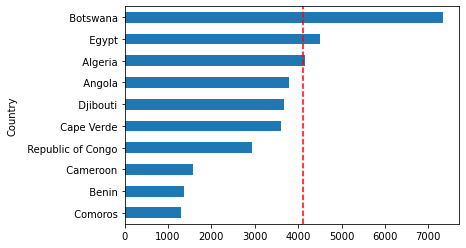

In [14]:
import matplotlib.pyplot as plt
df2.groupby('Country')['PCI'].sum().head(10).sort_values(ascending= True).plot(kind="barh")
plt.axvline(df2['PCI'].mean(), color = "r", linestyle= "--");